In [101]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)

$x_{n+1} = r  x_n  (1-x_n)$ 

In [2]:
def getNx(x0, r, n):
    res = [x0]
    for _ in range(1, n):
        x = res[-1]
        res.append(r * x * (1 - x))
    return np.array(res)


def get_last(x, m, n):
    return x[n : n + m]

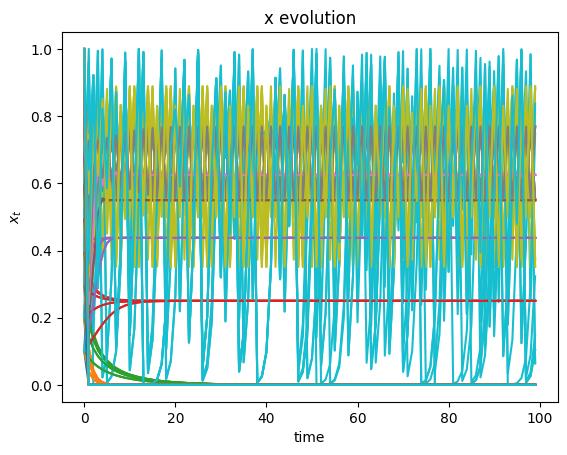

In [3]:
rs = np.linspace(0, 4, 10)
xs = np.linspace(0.1, 1, 10)
evolution_last_el = []
for x in xs:
    for r in rs:
        evolution = getNx(x, r, 100)
        evolution_last_el.append(get_last(evolution, 10, 90))
        plt.plot(evolution)
plt.title("x evolution")
plt.ylabel("$x_t$")
plt.xlabel("time")
plt.show()

In [4]:
rs = np.linspace(0, 4, 1000)
xs = np.linspace(0, 1, 40)
N_iter = int(1e3)
n_last = 10

results = []
for r in rs:
    resuts_for_r = []
    for x in xs:
        evolution = getNx(x, r, N_iter)
        last = get_last(evolution, n_last, N_iter - n_last)
        resuts_for_r.append(last)
    results.append(np.hstack(resuts_for_r))

Text(0, 0.5, '$x_{\\infty}$')

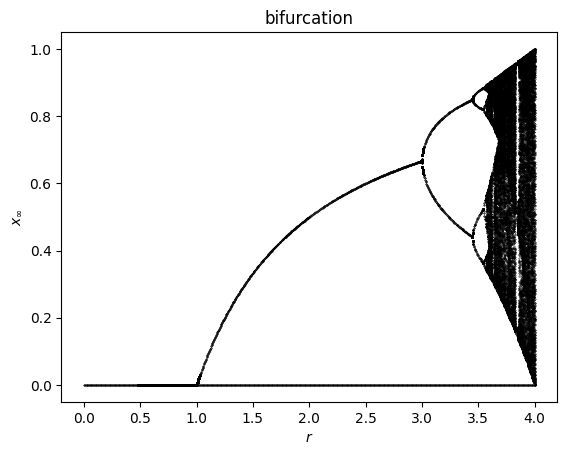

In [5]:
final_data = np.vstack(results)
for i, r in enumerate(rs):
    x = np.unique(final_data[i, :])
    XY = np.meshgrid(r, x)
    plt.scatter(*XY, c="black", s=0.1)
plt.title("bifurcation")
plt.xlabel("$r$")
plt.ylabel("$x_{\infty}$")

# Julia set

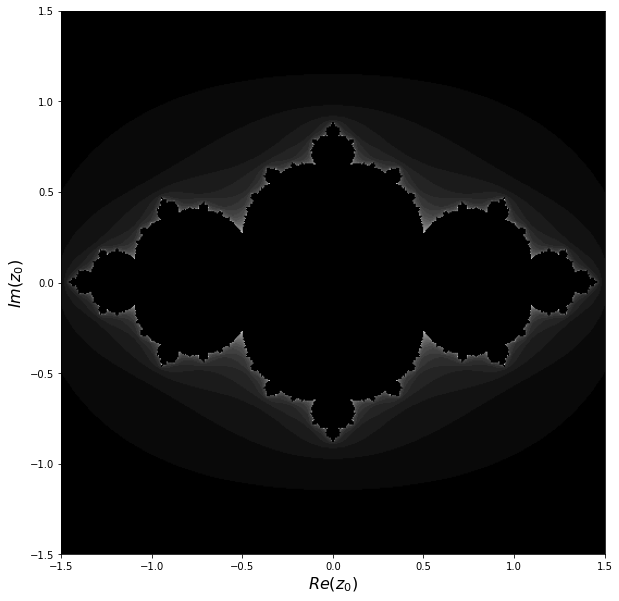

In [102]:
def my_julia(max_scale, resolution, max_iter, c):
    x, y = np.meshgrid(
        np.linspace(-max_scale, max_scale, resolution),
        np.linspace(-max_scale, max_scale, resolution),
    )
    z_arr = x + y * 1j

    old_shape = z_arr.shape

    iter_til_conv = np.zeros_like(z_arr, dtype=np.int16)
    is_converging = np.ones_like(z_arr, dtype=bool)

    for i in range(max_iter):
        z_arr[is_converging] = z_arr[is_converging] ** 2 + c
        is_diverged_now = (z_arr * np.conj(z_arr) > 4) & (is_converging)
        iter_til_conv[is_diverged_now] = i
        is_converging = is_converging & ~(is_diverged_now)

    return iter_til_conv.reshape(old_shape)


def plot_julia_img(ax, iter_til_conv, max_scale):
    ax.imshow(
        iter_til_conv,
        cmap="gray",
        extent=[-max_scale, max_scale, -max_scale, max_scale],
    )
    ax.set_ylabel("$Im(z_0)$", fontsize=16)
    ax.set_xlabel("$Re(z_0)$", fontsize=16)


max_scale = 1.5
iter_til_conv = my_julia(max_scale, 500, 255, c=1 - 1.68)

fig, ax = plt.subplots(1, 1)
plot_julia_img(ax, iter_til_conv, max_scale)

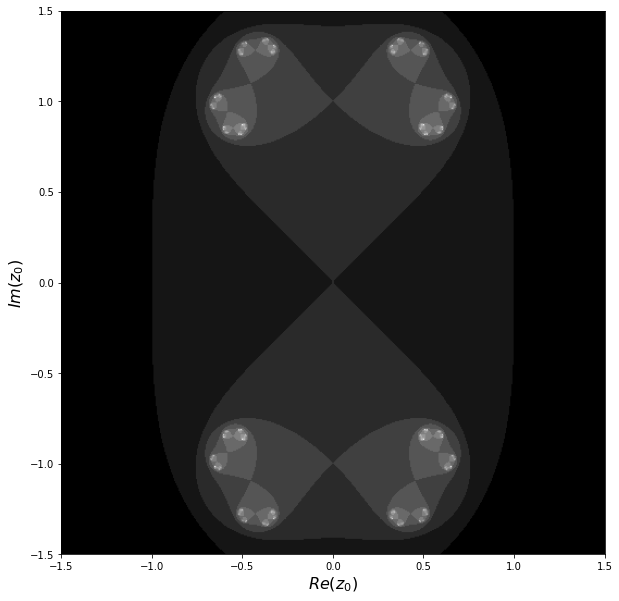

In [112]:
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
from IPython.display import Image

fig, ax = plt.subplots(1, 1)

a = np.linspace(0, 2 * np.pi, 20)


def AnimationFunction(frame):
    c = np.exp(1j * a[frame])
    plot_julia_img(ax, my_julia(max_scale, 500, 255, c=c), max_scale)


anim_created = FuncAnimation(fig, AnimationFunction, frames=a.shape[0], interval=1)
anim_created.save("HW1task2.gif", dpi=150, writer=PillowWriter(fps=5))

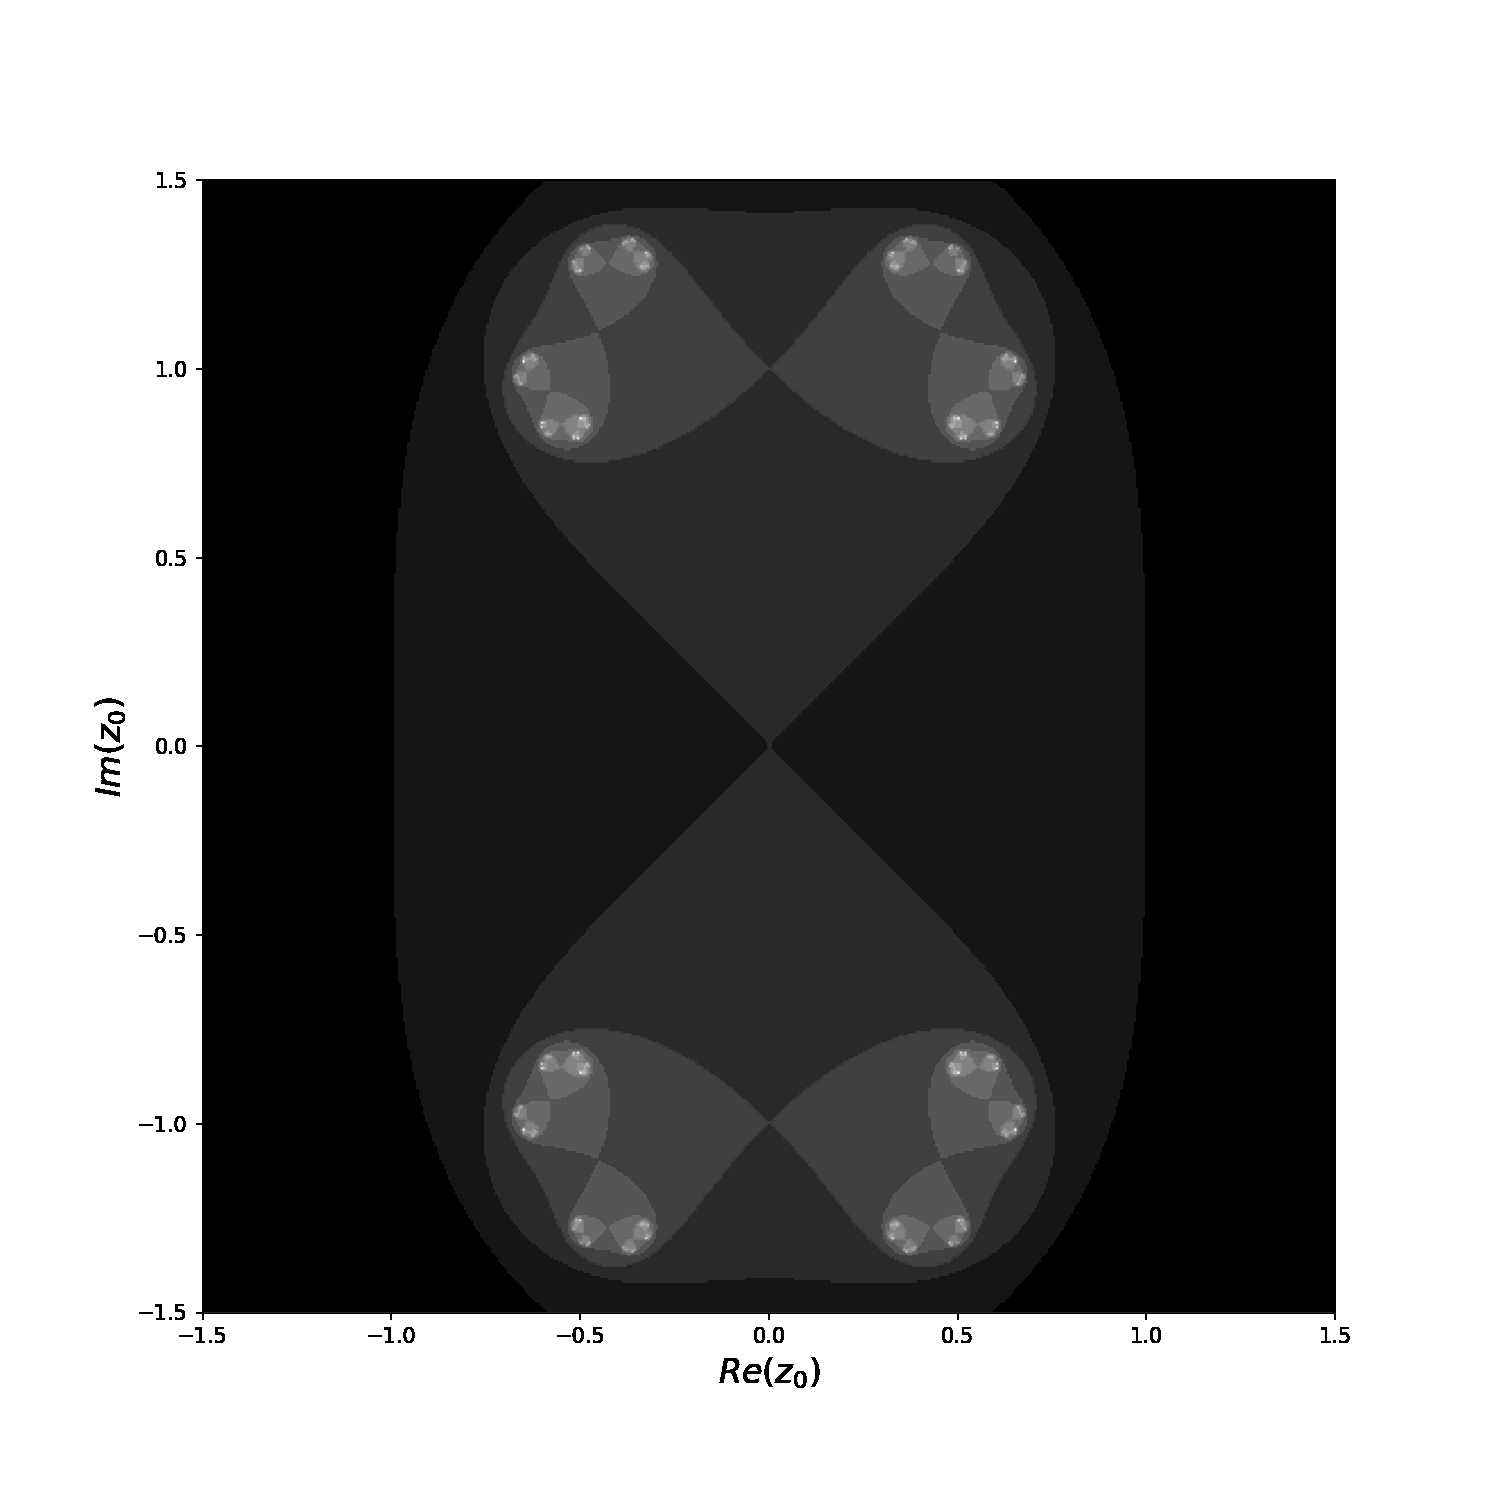

In [113]:
Image("HW1task2.gif")

In [ ]:
#